<a href="https://colab.research.google.com/github/denniss83/Perakende_Sektorunde_Finansal_Karsilastirma_2017_2024/blob/main/Perakende_Sekt%C3%B6r%C3%BCnde_Finansal_Kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rma_(2017%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafından hazırlanmıştır.  
Telif Hakkı © 2025 Deniz Atabey  
Bu çalışma [Creative Commons Atıf-GayriTicari 4.0 Uluslararası (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansı ile lisanslanmıştır.

- Yalnızca eğitim, akademik ve kişisel kullanım içindir.
- Ticari amaçlarla kullanılamaz.
- Herhangi bir kısmını kullanırsanız lütfen kaynak gösterin.

# Perakende Sektöründe Finansal Karşılaştırma (2017–2024)

Bu analizde Türkiye'nin dört büyük perakende zinciri olan **Migros, BİM, ŞOK ve CarrefourSA**'nın 2017–2024 dönemi finansal performansları incelenmiştir. Karşılaştırmalar yıllık bazda ve rasyolar üzerinden yapılmış; büyüklük, kârlılık, borçluluk ve likidite gibi temel göstergeler analiz edilmiştir.


---


>ℹ️ Kullanılan finansal veriler, ilgili şirketlerin Kamuyu Aydınlatma Platformu (KAP) ve yıllık faaliyet raporlarında halka açık olarak yayımlanan bilanço ve gelir tablolarından derlenmiştir. Herhangi bir ticari amaç taşımamakta olup yalnızca veri analizi ve eğitim amacıyla kullanılmıştır.


---




In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Veri Yükleme

Veriler Migros, BİM, ŞOK ve CarrefourSA'nın halka açık olarak yayınlanan yıllık bilanço verilerine dayanmaktadır.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving mig.xlsx to mig (1).xlsx


In [17]:
df = pd.read_excel("mig.xlsx")
df.head()

,Şirket,Bilanço,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Diğer Alacaklar,Stoklar,Diğer Dönen Varlıklar,(Ara Toplam),...,Sermaye Artırımı,Diğer Finansman Faaliyetlerinden Nakit,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Yab.ı Para Çevrim Fark. Nakit Ve Nakit Benz. Üzerindeki Etkisi,Diğer Nakit Girişi/Çıkışı,Nakit ve Benzerlerindeki Değişim,Diğer Nakit ve Nakit Benzerlerindeki Artış,Dönem Başı Nakit Değerler,Dönem Sonu Nakit
0,Migros,2024,1632365.450,637292.594,608.989,39556.245,30812.703,881403.528,42691.391,1632365.450,...,0.0,-108474.259,-199381.725,148387.661,-5823.798,0,142563.863,0,542624.357,685188.220
1,Migros,2023,1854264.275,604849.871,22642.610,18113.138,104144.578,1073556.473,30957.604,1854264.275,...,0.0,-127887.215,-207184.452,-22570.712,4563.478,0,-18007.234,0,766597.479,748590.246
2,Migros,2022,1795037.956,675424.087,34137.359,42861.200,5457.346,989786.248,47371.717,1795037.956,...,0.0,-128161.278,-140954.950,431714.016,-261968.955,0,169745.061,0,591737.686,761482.747
3,Migros,2021,651817.869,272024.339,194.413,13323.223,3125.066,350132.330,13018.498,651817.869,...,0.0,-137022.076,-249145.510,58570.248,-13579.610,0,44990.638,0,361987.701,406978.338
4,Migros,2020,986306.591,434672.865,790.964,23480.700,3747.494,449309.134,17446.554,929447.711,...,0.0,-178699.393,-346271.572,130598.669,-2177.716,0,128420.952,0,331311.867,459732.819


In [18]:
print(df["Şirket"].unique())
print(df["Bilanço"].unique())

['Migros' 'BİM' 'CARREFOUR' 'ŞOK ']
[2024 2023 2022 2021 2020 2019 2018 2017]


In [19]:
df.isnull().sum().sort_values(ascending=False).head(15)

,0
Şirket,0
Bilanço,0
Dönen Varlıklar,0
Nakit ve Nakit Benzerleri,0
Finansal Yatırımlar,0
Ticari Alacaklar,0
Diğer Alacaklar,0
Stoklar,0
Diğer Dönen Varlıklar,0
(Ara Toplam),0


In [20]:
df.dtypes[df.dtypes == 'object']

,0
Şirket,object


In [21]:
df = df.dropna(axis=1, how='all')

In [22]:
df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("  ", " ")

In [23]:
for col in df.columns:
    print(col)

Şirket
Bilanço
Dönen Varlıklar
Nakit ve Nakit Benzerleri
Finansal Yatırımlar
Ticari Alacaklar
Diğer Alacaklar
Stoklar
Diğer Dönen Varlıklar
(Ara Toplam)
Satış Amacıyla Elde Tutulan Duran Varlıklar
Duran Varlıklar
Diğer Alacaklar4
Finansal Yatırımlar6
Yatırım Amaçlı Gayrimenkuller
Kullanım Hakkı Varlıkları
Maddi Duran Varlıklar
Şerefiye
Maddi Olmayan Duran Varlıklar
Ertelenmiş Vergi Varlığı
Diğer Duran Varlıklar
TOPLAM VARLIKLAR
Kısa Vadeli Yükümlülükler
Finansal Borçlar
Diğer Finansal Yükümlülükler
Ticari Borçlar
Diğer Borçlar
Ertelenmiş Gelirler (Müşteri Söz. Doğan Yük. Dış.Kal.)
Dönem Karı Vergi Yükümlülüğü
Borç Karşılıkları
Diğer Kısa Vadeli Yükümlülükler
(Ara Toplam)9
Satış Amaçlı Elde Tutulan Duran Varlıklara İlişkin Yükümlülükler
Uzun Vadeli Yükümlülükler
Finansal Borçlar10
Diğer Finansal Yükümlülükler11
Ticari Borçlar12
Diğer Borçlar13
Müşteri Söz.Doğan Yük.
Finans Sektörü Faaliyetlerinden Borçlar14
Devlet Teşvik ve Yardımları15
Ertelenmiş Gelirler (Müşteri Söz.Doğan Yük. Dış.Ka

In [40]:
secili_kolonlar = [
    "Şirket", "Bilanço",
    "TOPLAM VARLIKLAR",
    "Nakit ve Nakit Benzerleri",
    "Stoklar",
    "Kısa Vadeli Yükümlülükler",
    "Uzun Vadeli Yükümlülükler",
    "DÖNEM KARI (ZARARI)",
    "Satış Gelirleri"
]

In [41]:
print(df.columns[df.columns.str.contains("Ara", case=False)])

Index(['(Ara Toplam)', '(Ara Toplam)9',
       'Satış Amaçlı Elde Tutulan Duran Varlıklara İlişkin Yükümlülükler',
       'Çalışanlara Sağlanan Faydalara İliş.Karş.',
       'Yabancı Para Çevrim Farkları', 'Geçmiş Yıllar Kar/Zararları',
       'Dönem Net Kar/Zararı', 'Ticari Faaliyetlerden Diğer Kar (Zarar)',
       'Ticari Faaliyetlerden Brüt Kar (Zarar)',
       'Finans Sektörü Faaliyetlerinden Diğer Kar (Zarar)',
       'Finans Sektörü Faaliyetlerinden Brüt Kar (Zarar)', 'BRÜT KAR (ZARAR)',
       'Araştırma ve Geliştirme Giderleri (-)', 'FAALİYET KARI (ZARARI)',
       'Net Faaliyet Kar/Zararı',
       'Özkaynak Yöntemiyle Değerlenen Yatırımların Kar/Zararlarındaki Paylar',
       'Finansman Gideri Öncesi Faaliyet Karı/Zararı',
       'SÜRDÜRÜLEN FAALİYETLER VERGİ ÖNCESİ KARI (ZARARI)',
       'SÜRDÜRÜLEN FAALİYETLER DÖNEM KARI/ZARARI',
       'Durdurulan Faaliyetler Vergi Sonrası Dönem Karı (Zararı)',
       'DÖNEM KARI (ZARARI)', 'Dönem Kar/Zararının Dağılımı',
       'Net Yabanc

In [42]:
df_kucuk = df[secili_kolonlar].copy()

df_long = pd.melt(
    df_kucuk,
    id_vars=["Şirket", "Bilanço"],
    var_name="Metrik",
    value_name="Değer"
)

df_long.head()

,Şirket,Bilanço,Metrik,Değer
0,Migros,2024,TOPLAM VARLIKLAR,4245691.833
1,Migros,2023,TOPLAM VARLIKLAR,4510334.336
2,Migros,2022,TOPLAM VARLIKLAR,4357260.196
3,Migros,2021,TOPLAM VARLIKLAR,1355524.976
4,Migros,2020,TOPLAM VARLIKLAR,2068973.455


# Satış Gelirleri (2017-2024)

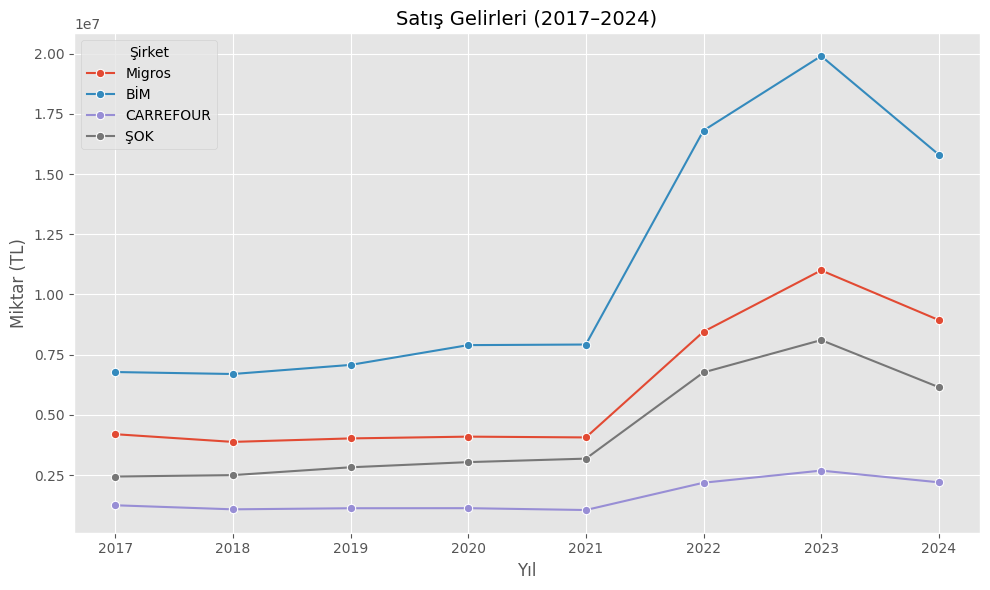

In [45]:
df_sat = df_long[df_long["Metrik"] == "Satış Gelirleri"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sat, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Satış Gelirleri (2017–2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yıl")
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Satış Gelirleri Analizi (2017–2024)


>BİM:
>
>- Her yıl lider konumda.
>
>- 2022–2023 arasında hızlı bir sıçrama olmuş.
>
>- 2024'te bir miktar düşüş var ama hâlâ en yüksek satışa sahip.
>
>Migros:
>
>- Satışlar sabit kalmış gibi görünüyor.
>
>- BİM ile arası 2022 sonrası açılmış.
>
>Carrefour:
>- 2021 sonrası ciddi yükselmiş ama BİM ve Migros'un altında.
>
>ŞOK:
>- En düşük satış hacmine sahip.
>
>- 2022’de yükselmiş ama yine en alt düzeyde seyrediyor.



# Toplam Varlıklar (2017–2024)

🎯 Neden Önemli?

>- Şirketin bilanço büyüklüğünü gösterir.
>
>- Zaman içinde büyümüş mü, küçülmüş mü net görülür.
>
>- Karlılık ile ilişkilendirilebilir (örneğin: büyük varlığı olup zarar eden var mı?)

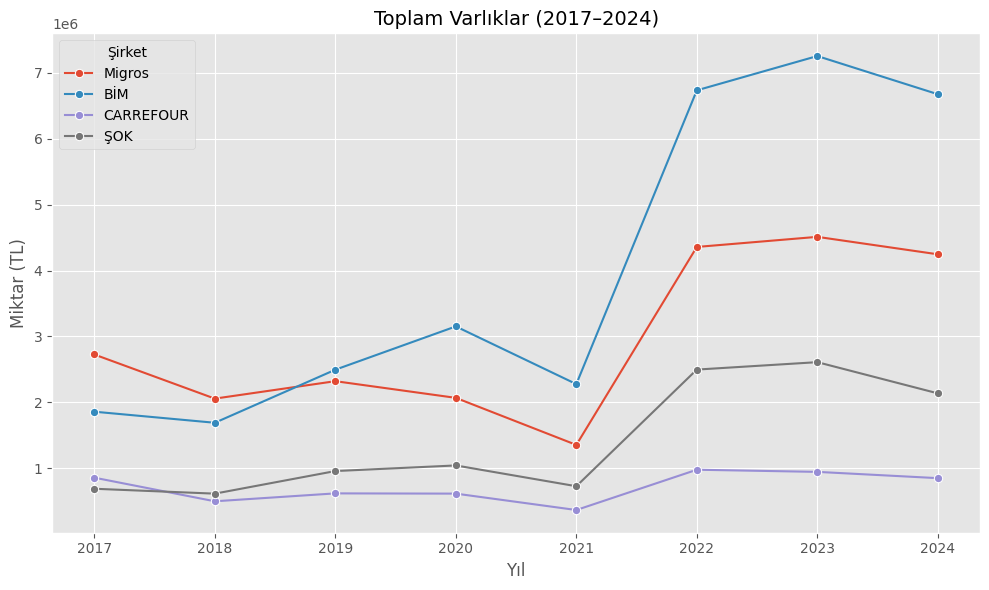

In [46]:
df_varlik = df_long[df_long["Metrik"] == "TOPLAM VARLIKLAR"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_varlik, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Toplam Varlıklar (2017–2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yıl")
plt.grid(True)
plt.tight_layout()
plt.show()

# DÖNEM KARI/ZARARI (2017-2024)

🎯 Amaç:

>- Satışlar artıyor ama şirket kâr ediyor mu?
>
>- Hangi firma kârlı çalışıyor, hangisi zarar ediyor?
>
>- Zaman içinde istikrar var mı?

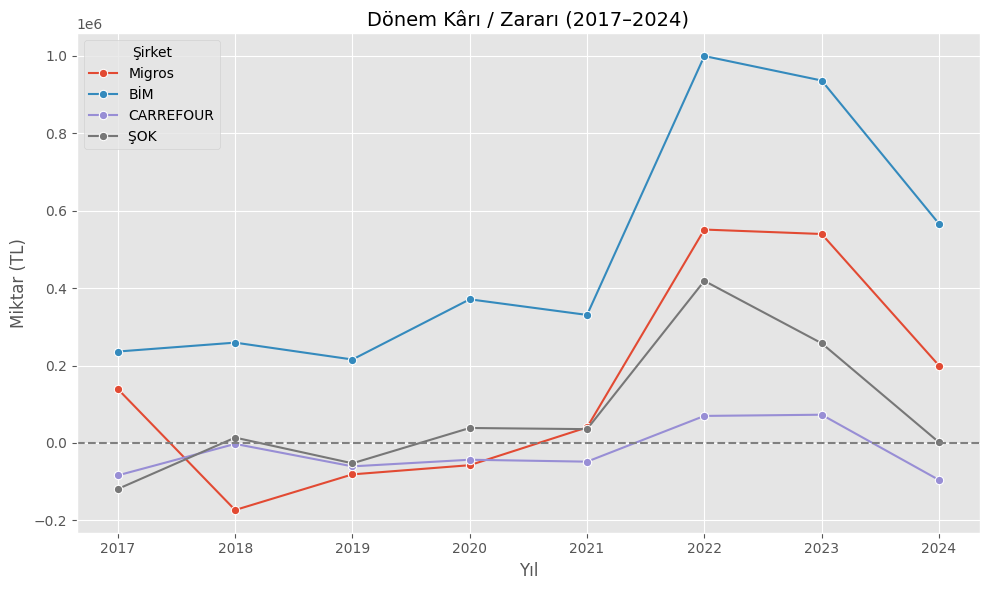

In [47]:
df_kar = df_long[df_long["Metrik"] == "DÖNEM KARI (ZARARI)"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kar, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Dönem Kârı / Zararı (2017–2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yıl")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Borç Analizi – Kısa + Uzun Vadeli Yükümlülükler

🎯 Amaç:
>
>- Şirketlerin toplam borç yükünü analiz etmek
>
>- Büyüme borçla mı, özkaynakla mı olmuş?
>
>- Yıllar içinde borç yapısında artış/azalış var mı?

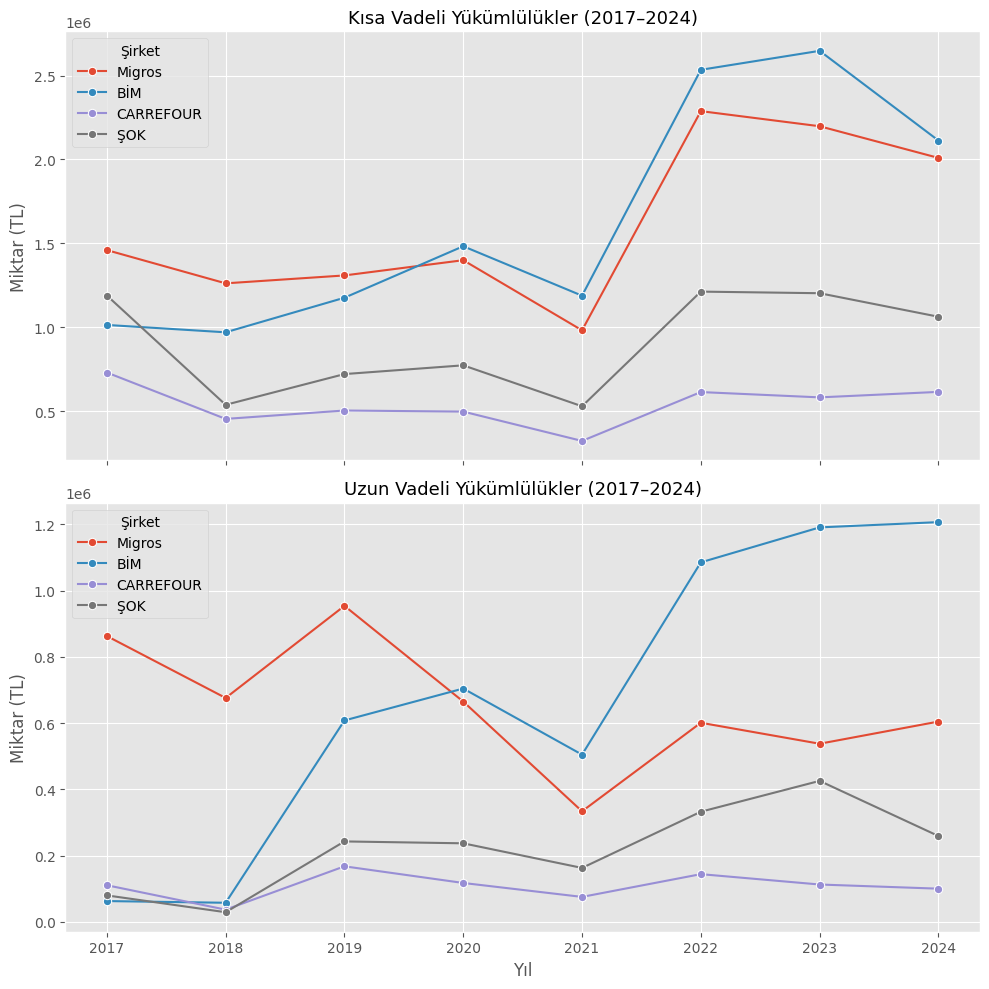

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

df_kv = df_long[df_long["Metrik"] == "Kısa Vadeli Yükümlülükler"]
sns.lineplot(data=df_kv, x="Bilanço", y="Değer", hue="Şirket", marker="o", ax=ax[0])
ax[0].set_title("Kısa Vadeli Yükümlülükler (2017–2024)", fontsize=13)
ax[0].set_ylabel("Miktar (TL)")
ax[0].grid(True)

df_uv = df_long[df_long["Metrik"] == "Uzun Vadeli Yükümlülükler"]
sns.lineplot(data=df_uv, x="Bilanço", y="Değer", hue="Şirket", marker="o", ax=ax[1])
ax[1].set_title("Uzun Vadeli Yükümlülükler (2017–2024)", fontsize=13)
ax[1].set_ylabel("Miktar (TL)")
ax[1].set_xlabel("Yıl")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Finansal Rasyolar Analizi

🎯 Amaç:
>
>Şirketlerin finansal yapılarını normalize ederek karşılaştırmak. Yani mutlak değerler yerine oranlarla değerlendirmek. Böylece:
>
>Şirket büyüklüğünden bağımsız değerlendirme yapılır
>
>Risk, kârlılık ve borçluluk net görülür

In [53]:
df_kucuk["Borç_Varlık_Oranı"] = (
    (df_kucuk["Kısa Vadeli Yükümlülükler"] + df_kucuk["Uzun Vadeli Yükümlülükler"]) / df_kucuk["TOPLAM VARLIKLAR"]
)

df_kucuk["Net_Kar_Marjı"] = df_kucuk["DÖNEM KARI (ZARARI)"] / df_kucuk["Satış Gelirleri"]

df_kucuk["Hazır_Oranı"] = df_kucuk["Nakit ve Nakit Benzerleri"] / df_kucuk["Kısa Vadeli Yükümlülükler"]

df_kucuk["Stok_Varlık_Oranı"] = df_kucuk["Stoklar"] / df_kucuk["TOPLAM VARLIKLAR"]

In [54]:
df_rasyolar = df_kucuk[[
    "Şirket", "Bilanço",
    "Borç_Varlık_Oranı",
    "Net_Kar_Marjı",
    "Hazır_Oranı",
    "Stok_Varlık_Oranı"
]]

df_rasyolar_long = df_rasyolar.melt(id_vars=["Şirket", "Bilanço"],
                                    var_name="Rasyo",
                                    value_name="Değer")

# Borç / Toplam Varlık Oranı

🎯 Amaç:

>- Oran 0.5 ise: Varlıkların %50’si borçla finanse ediliyor demektir.
>
>- Zamanla artıyorsa: Şirket daha fazla borçlanıyor.
>
>- Diğer şirketlerle karşılaştırıldığında yüksekse: Daha riskli olabilir.

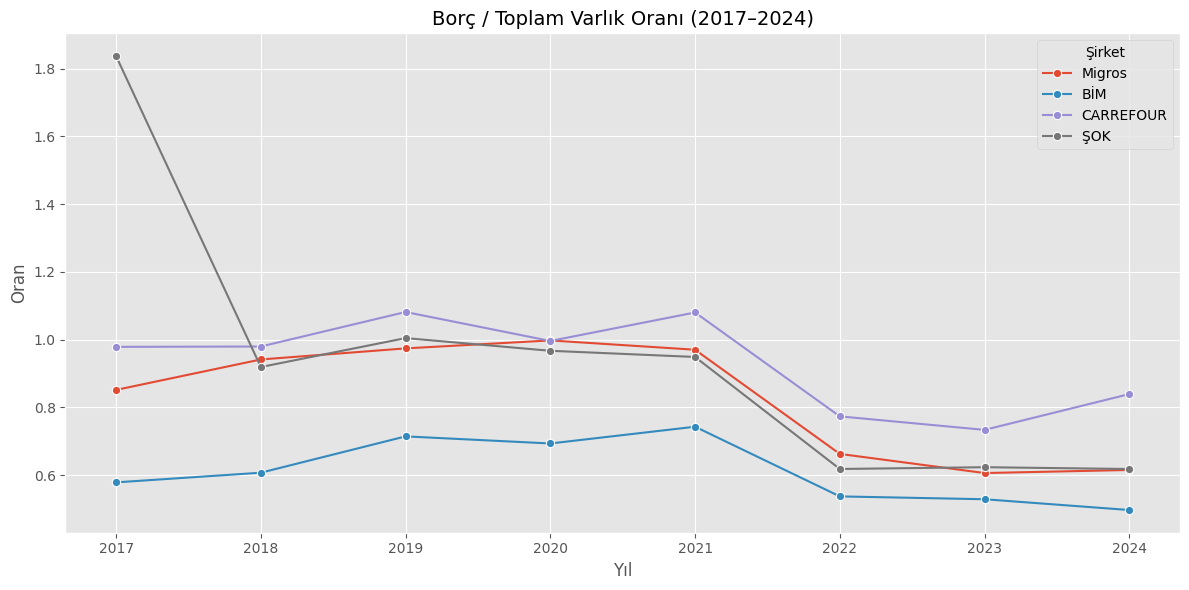

In [56]:
df_borc = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Borç_Varlık_Oranı"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_borc, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Borç / Toplam Varlık Oranı (2017–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# Net Kâr Marjı (Karlılık Oranı)

🎯 Amaç:
>
>- Yüksek marj: Verimli ve kârlı operasyonları işaret eder.
>
>- Düşük hatta negatif marj: Zarar veya düşük kârlılık anlamına gelir.
>
>- Yıllar içindeki eğilim: Şirketlerin kârlılık gelişimi ve sürdürülebilirliği hakkında ipucu verir.

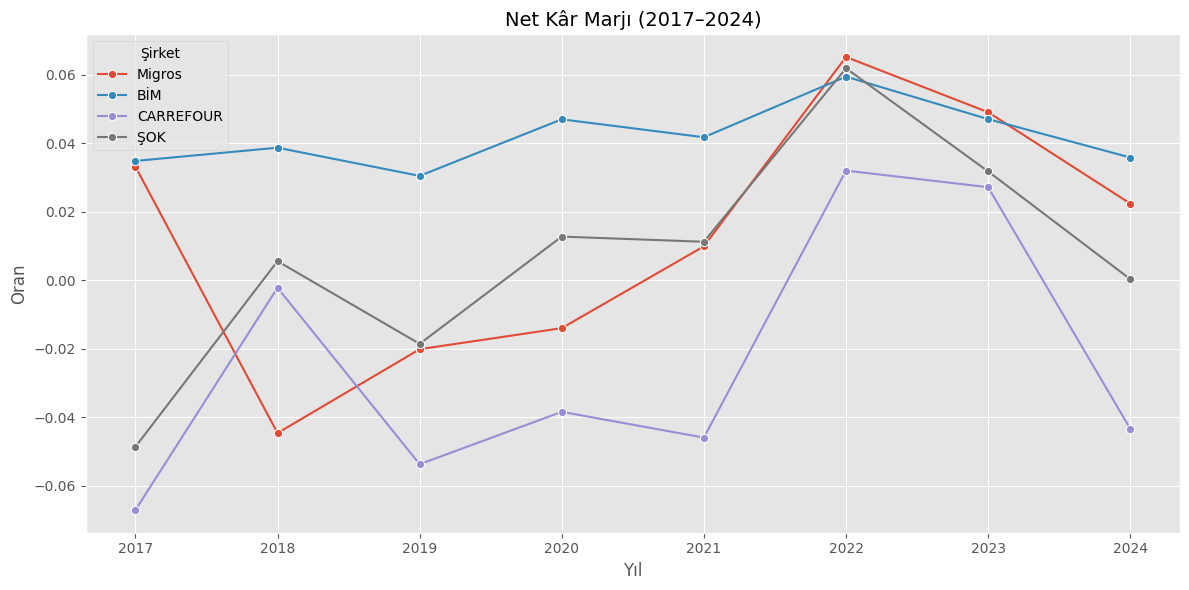

In [57]:
df_kar = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Net_Kar_Marjı"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kar, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Net Kâr Marjı (2017–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hazır Oran – Likidite Göstergesi

🎯 Tanım:
>
>- Hazır Oran = Nakit ve Benzerleri / Kısa Vadeli Yükümlülükler
>
>- Bu oran şirketin kısa vadeli borçlarını hemen ödeyebilme kabiliyetini gösterir.
>
>- >1 olması idealdir (nakit > borç)

>- <1 ise kısa vadeli ödeme sıkıntısı riski taşıyabilir

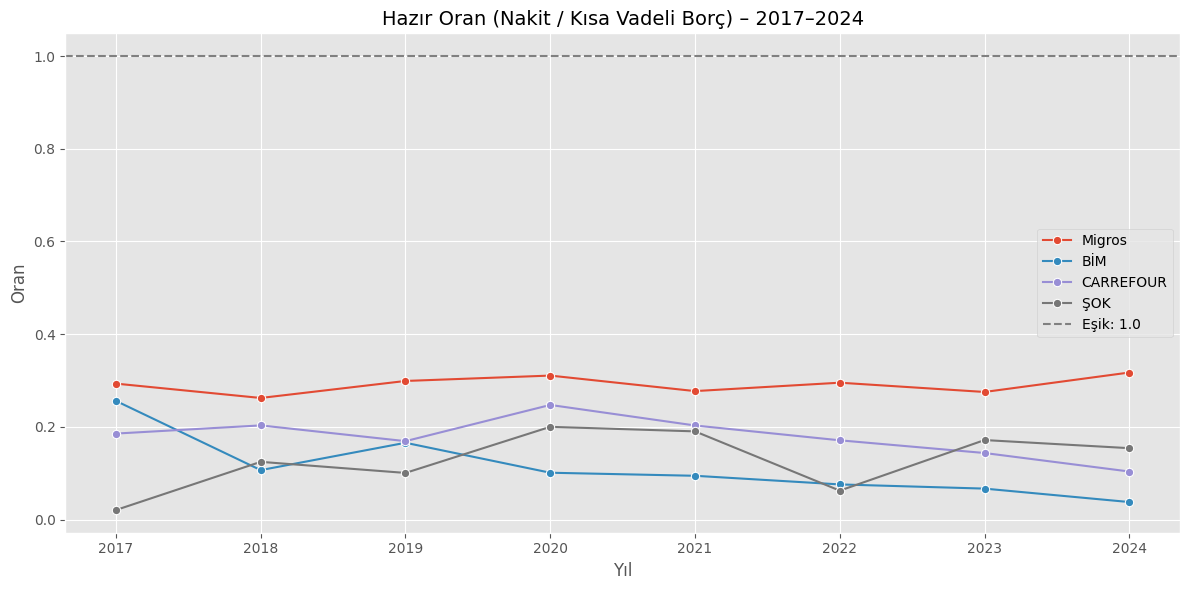

In [58]:
df_hazir = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Hazır_Oranı"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hazir, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Hazır Oran (Nakit / Kısa Vadeli Borç) – 2017–2024", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.axhline(1, color='gray', linestyle='--', label='Eşik: 1.0')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Stok / Varlık Oranı – Envanter Yoğunluğu

🎯 Tanım:
>
>- Stok Oranı = Stoklar / Toplam Varlıklar
>
>- Şirketin varlıklarının ne kadarının stoklara bağlı olduğunu gösterir.
>
>- Yüksek oran, nakde dönüşmesi zaman alabilecek varlıklara fazla bağlılık anlamına gelir.
>
>- Düşük oran, daha çevik ve likit bir yapı göstergesidir.

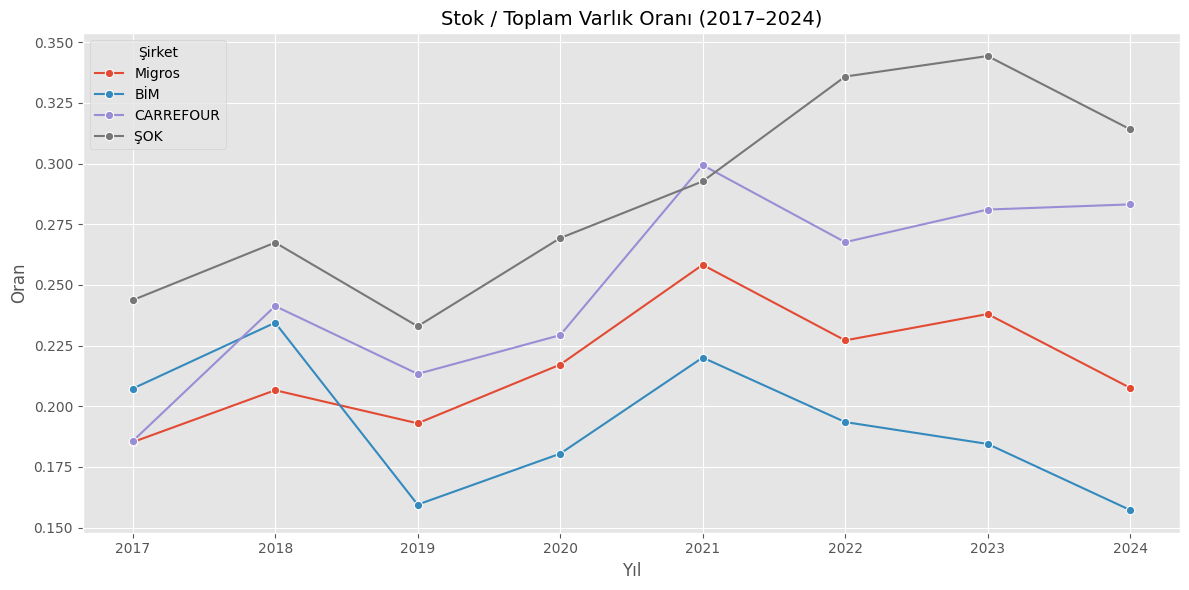

In [59]:
df_stok = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Stok_Varlık_Oranı"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stok, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Stok / Toplam Varlık Oranı (2017–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧮 1. Aktif Karlılık (ROA – Return on Assets)

- Şirketin toplam varlıkları üzerinden ne kadar kâr elde ettiğini gösterir.

- ROA = Dönem Karı (Zararı) / Toplam Varlıklar

In [71]:
df["ROA"] = df["DÖNEM KARI (ZARARI)"] / df["TOPLAM VARLIKLAR"]

In [72]:
df_roa_long = df[["Şirket", "Bilanço", "ROA"]].copy()
df_roa_long = df_roa_long.rename(columns={"ROA": "Değer"})
df_roa_long["Rasyo"] = "ROA"

df_rasyolar_long = pd.concat([df_rasyolar_long, df_roa_long], ignore_index=True)

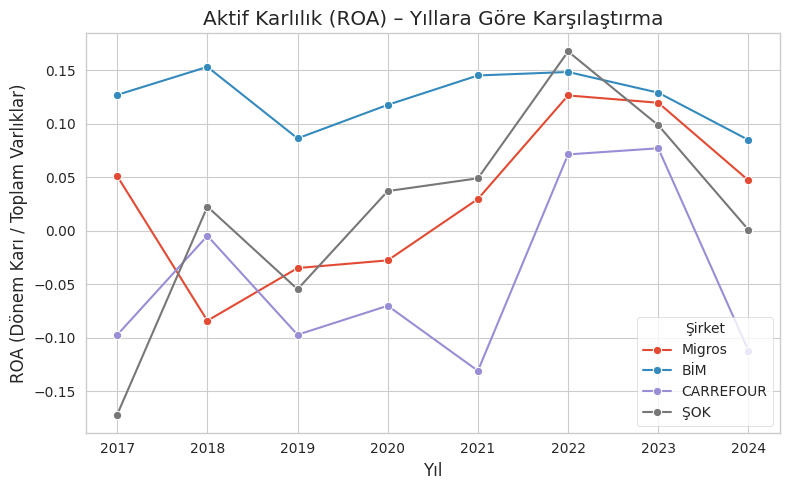

In [75]:
df_roa_only = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "ROA"]

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.lineplot(data=df_roa_only, x="Bilanço", y="Değer", hue="Şirket", marker="o")

plt.title("Aktif Karlılık (ROA) – Yıllara Göre Karşılaştırma")
plt.xlabel("Yıl")
plt.ylabel("ROA (Dönem Karı / Toplam Varlıklar)")
plt.legend(title="Şirket")
plt.tight_layout()
plt.show()

## Şirket Bazlı Ortalama ROA (2017–2024)

In [77]:
roa_ortalama = df_roa_only.groupby("Şirket")["Değer"].mean().sort_values(ascending=False).reset_index()

print("🔎 2017–2024 Döneminde Şirket Bazlı Ortalama ROA:")
display(roa_ortalama)

🔎 2017–2024 Döneminde Şirket Bazlı Ortalama ROA:


,Şirket,Değer
0,BİM,0.123958
1,Migros,0.028398
2,ŞOK,0.018634
3,CARREFOUR,-0.045528


## Yıl Bazında En Yüksek ROA’ya Sahip Şirket

In [78]:
roa_max_yil = df_roa_only.loc[df_roa_only.groupby("Bilanço")["Değer"].idxmax()].reset_index(drop=True)

print("🏆 Yıllık En Yüksek ROA’ya Sahip Şirketler:")
display(roa_max_yil[["Bilanço", "Şirket", "Değer"]])

🏆 Yıllık En Yüksek ROA’ya Sahip Şirketler:


,Bilanço,Şirket,Değer
0,2017,BİM,0.126989
1,2018,BİM,0.153191
2,2019,BİM,0.086347
3,2020,BİM,0.117673
4,2021,BİM,0.145159
5,2022,ŞOK,0.167568
6,2023,BİM,0.129045
7,2024,BİM,0.084850


# ROE (Özsermaye Karlılığı)

In [81]:
df_kucuk["ROE"] = df_kucuk["DÖNEM KARI (ZARARI)"] / df_kucuk["TOPLAM VARLIKLAR"]



df_roe_long = df_kucuk[["Şirket", "Bilanço", "ROE"]].rename(columns={"ROE": "Değer"})
df_roe_long["Rasyo"] = "ROE"

df_rasyolar_long = pd.concat([df_rasyolar_long, df_roe_long], ignore_index=True)


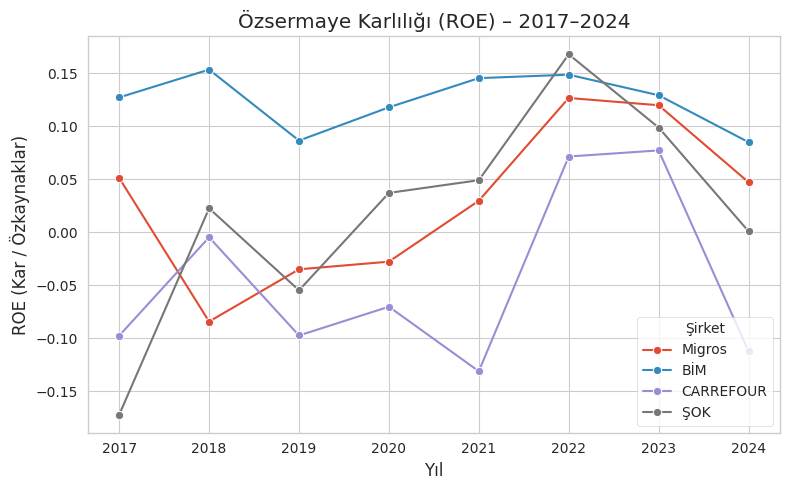

In [82]:
df_roe_only = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "ROE"]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_roe_only, x="Bilanço", y="Değer", hue="Şirket", marker="o")
plt.title("Özsermaye Karlılığı (ROE) – 2017–2024")
plt.xlabel("Yıl")
plt.ylabel("ROE (Kar / Özkaynaklar)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
roe_ortalama = df_roe_only.groupby("Şirket")["Değer"].mean().sort_values(ascending=False).reset_index()
print("🔎 Ortalama ROE (2017–2024):")
display(roe_ortalama)

roe_max_yil = df_roe_only.loc[df_roe_only.groupby("Bilanço")["Değer"].idxmax()].reset_index(drop=True)
print("🏆 Yıl Bazında En Yüksek ROE'ya Sahip Şirketler:")
display(roe_max_yil[["Bilanço", "Şirket", "Değer"]])

🔎 Ortalama ROE (2017–2024):


,Şirket,Değer
0,BİM,0.123958
1,Migros,0.028398
2,ŞOK,0.018634
3,CARREFOUR,-0.045528


🏆 Yıl Bazında En Yüksek ROE'ya Sahip Şirketler:


,Bilanço,Şirket,Değer
0,2017,BİM,0.126989
1,2018,BİM,0.153191
2,2019,BİM,0.086347
3,2020,BİM,0.117673
4,2021,BİM,0.145159
5,2022,ŞOK,0.167568
6,2023,BİM,0.129045
7,2024,BİM,0.084850


# 📊Dashboard Grafik

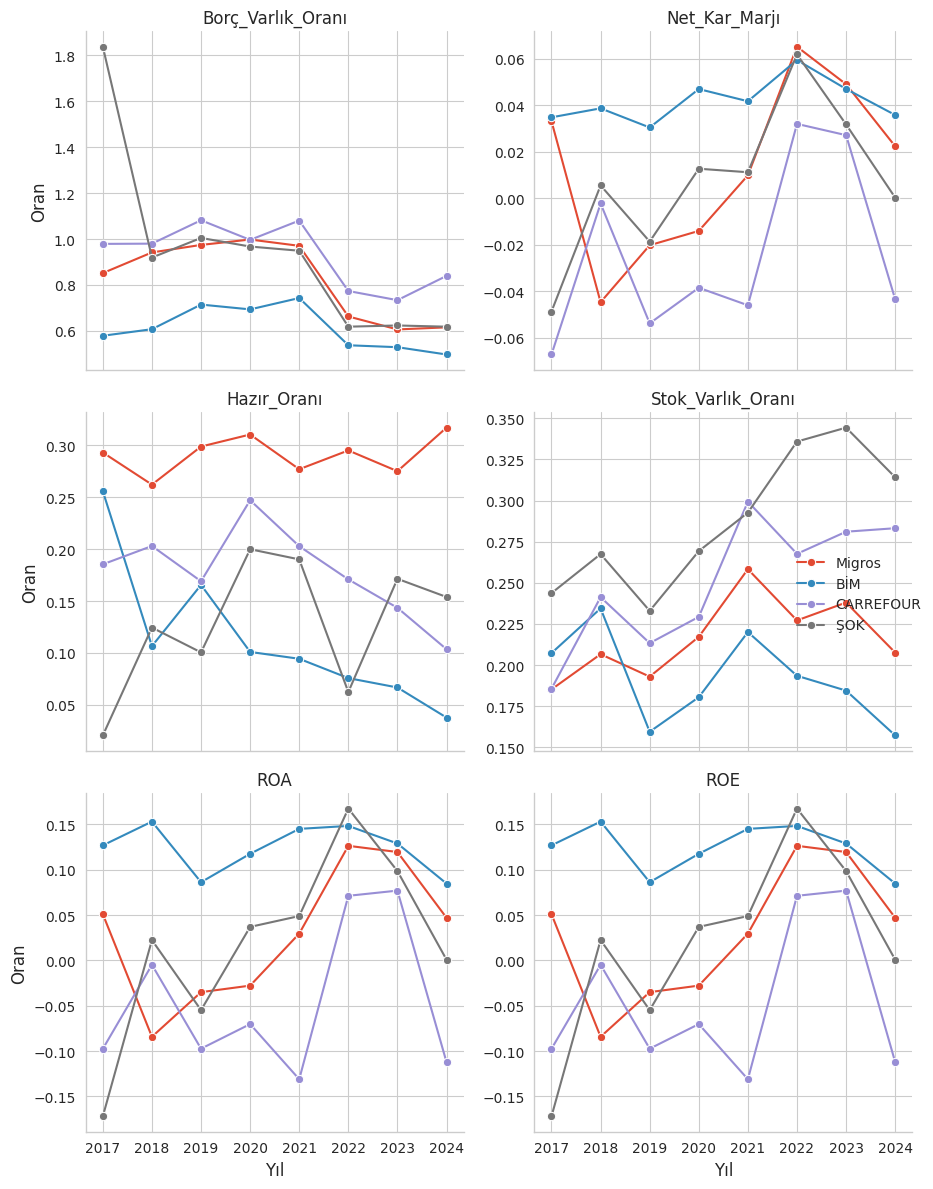

In [83]:
g = sns.FacetGrid(df_rasyolar_long, col="Rasyo", col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Bilanço", y="Değer", hue="Şirket", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Yıl", "Oran")
g.add_legend()
plt.tight_layout()
plt.show()

# 📌 Genel Değerlendirme ve Sonuç

Bu çalışmada Türkiye’nin önde gelen dört perakende zinciri olan **Migros, BİM, ŞOK ve CarrefourSA**’nın 2017–2024 dönemine ait finansal tabloları analiz edilmiştir. Analiz kapsamında şirketlerin hem mutlak büyüklükleri hem de rasyolar üzerinden göreli performansları değerlendirilmiştir.

---

### 1. Büyüklük ve Satış Performansı

- **BİM**, satış gelirleri ve toplam varlıklar açısından her yıl lider konumdadır.
- **Migros**, istikrarlı büyüme göstermiştir.
- **CarrefourSA**, özellikle 2021 sonrası dikkat çeken bir büyüme ivmesi yakalamıştır.
- **ŞOK**, daha düşük bir hacme sahip olsa da stabil bir büyüme trendi içindedir.

---

### 2. Kârlılık (Net Kâr Marjı ve ROA)

- **BİM**, net kâr marjı ve ROA açısından en istikrarlı ve yüksek kârlılığa sahip firmadır.
- **Migros** ve **CarrefourSA**, dalgalı bir kârlılık yapısına sahiptir.
- **ŞOK**, çoğu yıl zarar açıklamıştır ve negatif marjlar göstermektedir.

---

### 3. Borçluluk Yapısı

- **ŞOK** ve **Migros**, en yüksek borç/varlık oranına sahiptir.
- **BİM**, borçluluk açısından en sağlam yapıdadır.

---

### 4. Likidite (Hazır Oran)

- Tüm şirketlerde hazır oran çoğunlukla 1’in altındadır, bu da kısa vadeli borç ödeme kapasitesinde sıkıntı olabileceğini gösterir.
- En yüksek hazır oran **Migros**’tadır.

---

### 5. Stok Yönetimi

- **CarrefourSA**, envanter yoğunluğu en yüksek şirkettir.
- **BİM**, düşük stok oranı ile tedarik zinciri verimliliğini göstermektedir.

---

## 🔍 Genel Bakış:

- **BİM**, finansal sağlamlık ve operasyonel verimlilik açısından en güçlü şirket olarak öne çıkmaktadır.
- **Migros** ve **CarrefourSA**, zaman zaman güçlü kârlılıklar sergileseler de yüksek borçluluk ve düşük likidite ile dengelenmektedir.
- **ŞOK**, agresif büyüme yerine istikrarlı ve düşük riskli yapıya odaklanmalıdır.




---



> ❗️ Bu analiz yalnızca python ile eğitim ve veri analizi amacıyla hazırlanmıştır. Hiçbir ticari amaç güdülmemektedir. Yatırım tavsiyesi içermez.

---

